In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

Data Description -

**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc**- Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [ ]:
# lets import some liabiraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# lets import data set 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone project/Mobile Price Range Prediction/Copy of data_mobile_price_range.csv')

In [ ]:
# lets chech data type in data frame 
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# with help of describe command we will check the if there is any null value in data and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

seems like there is no null value in data and all feature are in either in form of int and float 

lets do the univariant anylysisis of some feature

In [ ]:
# check for some outlier in feature 
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# lets check the category distrubtion in categorial feature
categorical_feature_list = ['blue','four_g','dual_sim','three_g','touch_screen','wifi','price_range']

In [ ]:
# lets define the list of all columns 
list_of_columns = []
for i in df.columns:
  list_of_columns.append(i)
print(list_of_columns)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [ ]:
non_categorical_feature = []
for i in list_of_columns:
  if i not in categorical_feature_list:
    non_categorical_feature.append(i)
print(non_categorical_feature)


['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


Doing univariant anylysis for battery power 

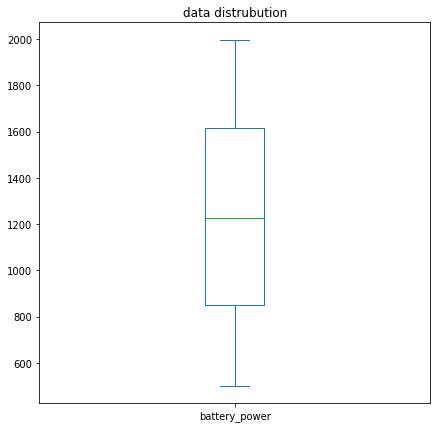

In [ ]:
plt.rcParams["figure.figsize"] = [7, 7]
ax = df['battery_power'].plot(kind='box',title='data distrubution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


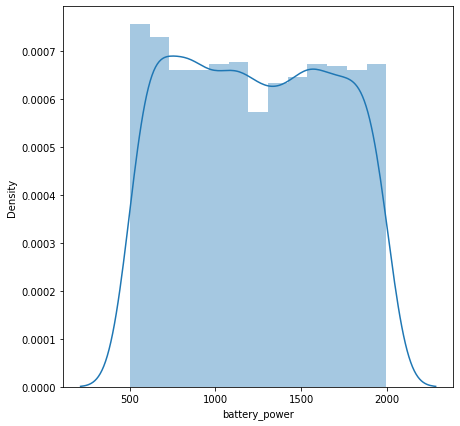

In [ ]:
sns.distplot(df['battery_power'])

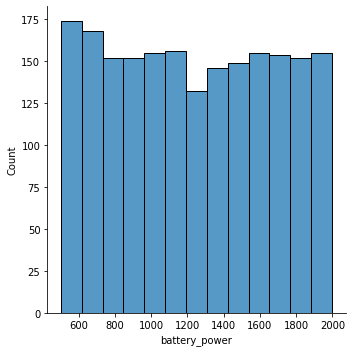

In [ ]:
sns.displot(df['battery_power'])

Doing univariant anylysis for height and weight of mobile data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


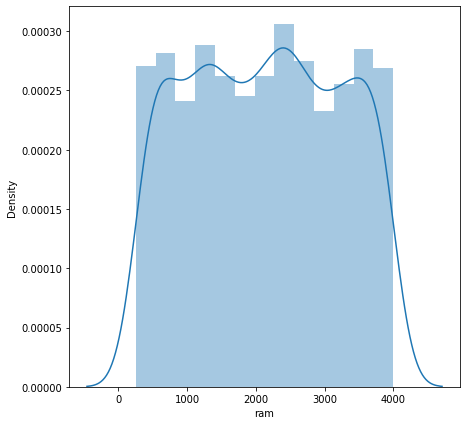

In [ ]:
sns.distplot(df['ram'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


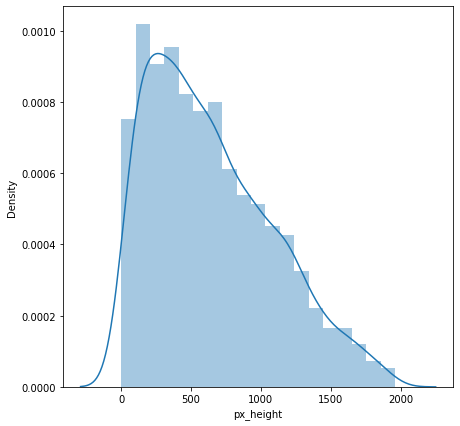

In [ ]:
sns.distplot(df['px_height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


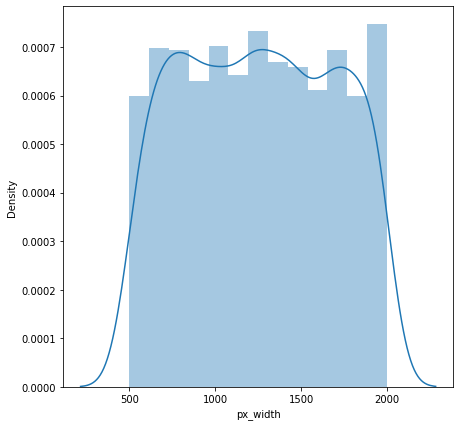

In [ ]:
sns.distplot(df['px_width'])

lets do our target variable anylysis price 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


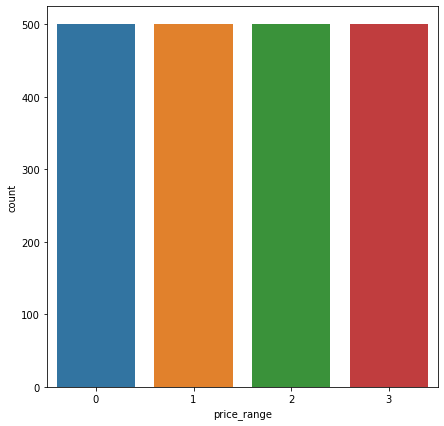

In [ ]:
sns.countplot(df['price_range'])

its seem good all target variable are balance present in equal count there is no imbalance in target class


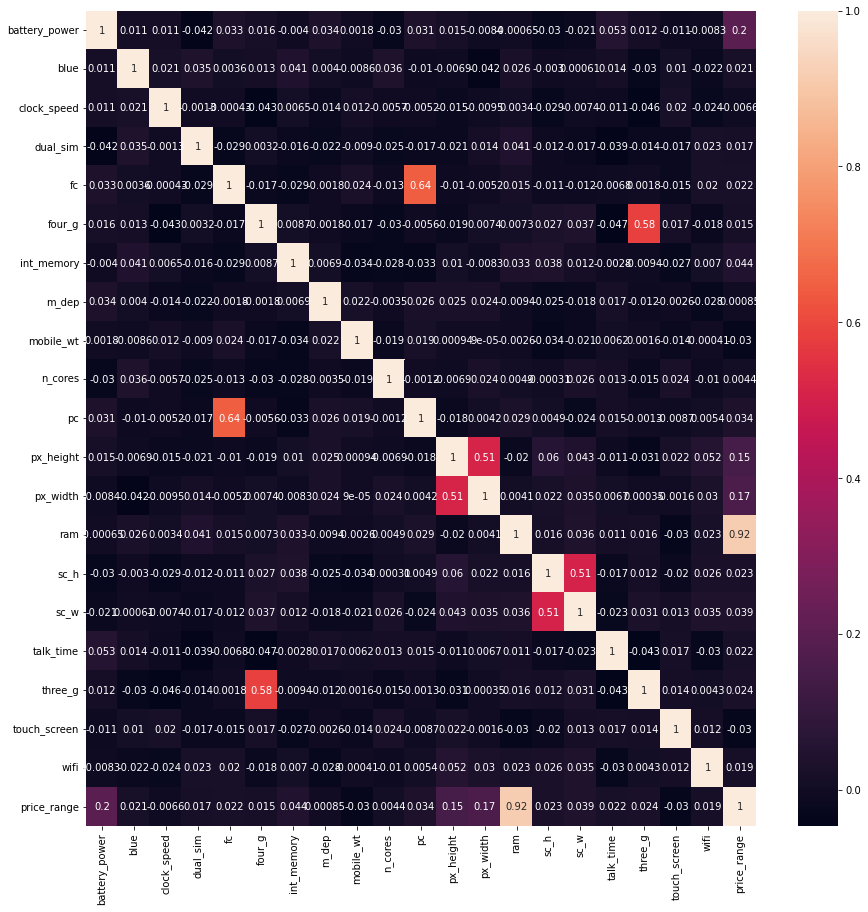

In [ ]:
plt.rcParams["figure.figsize"] = [15, 15]
ax = sns.heatmap(df.corr(),annot=True)
plt.show()

As per observation from heat mat there is no corrilation in any feature except ram is much corrilate with price 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


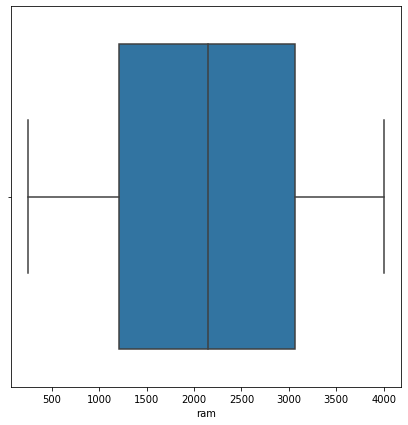

In [ ]:
# lets check for any outlier in ram as it is very much corrilated with the target variable 
plt.rcParams["figure.figsize"] = [7, 7]
ax = sns.boxplot(df['ram'])
plt.show()

Now we will devide the our dependent and independent variable 


In [ ]:
#from sklearn.preprocessing import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import  XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X = df.drop('price_range',axis = 1)
y = df['price_range']

In [ ]:
#std = StandardScaler()
#X = std.fit_transform(X)

In [ ]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [ ]:
# lets divide data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# here we are defining all set of hyperparameter which we want check for dirrent model we are going to use 
param_grid_rf = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

param_grid_dicision_tree = {'criterion':['gini','entropy'],'splitter':['best','random'], 
    'max_features': ['auto', 'sqrt', 'log2']}
param_grid_xgb = {'max_depth':[3,6,8],'learnig_rate':[0.1,0.3,0.5],'n_estimators':[100,200,500]}


In [ ]:
# lets define object for our model we will be using 
rfc = RandomForestClassifier(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
xgb_classifier = XGBClassifier()

In [ ]:
# lets find out the best parameter for random forest
rfc_grid = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,cv=5)
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
# best hyper parameter for random forest
rfc_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
# lets find out the best parameter for decison tree
dtc_grid = GridSearchCV(dtc,param_grid=param_grid_dicision_tree,cv=5)
dtc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [ ]:
# best hyper parameter for decision tree
dtc_grid.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# lets train the random forest on best parameter we have got 
rfc_1 = RandomForestClassifier(criterion= 'entropy',
 max_depth= 6,
 max_features= 'auto',
 n_estimators = 500)
rfc_1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=500)

In [ ]:
# we will train the decision tree on our best hyper parameter 
dtc_1 = DecisionTreeClassifier(criterion='entropy',max_features='auto',max_depth=6)
dtc_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto')

In [ ]:
# now with the help of grid search we will find out the best param for xgb
xgb_grid = GridSearchCV(xgb_classifier,param_grid = param_grid_xgb,cv=5)
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learnig_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 6, 8],
                         'n_estimators': [100, 200, 500]})

In [ ]:
# best hyper parameter for  xg boost  
xgb_grid.best_params_

{'learnig_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [ ]:
# we will train the xg boost model on our best hyper parameter 
xgb_1 = XGBClassifier(learning_rate=0.1,max_depth=2,n_estimators=300)
xgb_1.fit(X_train,y_train)

XGBClassifier(max_depth=2, n_estimators=300, objective='multi:softprob')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# predicting test and train class result using diffrent model we have train 
# frist we predict using random forest 
train_class_pred_rf = rfc_1.predict(X_train)
test_class_pred_rf = rfc_1.predict(X_test)

# we will predict result of decision tree
train_class_pred_dtc = dtc_1.predict(X_train)
test_class_pred_dtc = dtc_1.predict(X_test)

# we will predict result of xg boost
train_class_pred_xgb = xgb_1.predict(X_train)
test_class_pred_xgb = xgb_1.predict(X_test)

In [ ]:
# Calculating accuracy on train and test using random forest 
train_accuracy_rf = accuracy_score(y_train,train_class_pred_rf)
test_accuracy_rf = accuracy_score(y_test,test_class_pred_rf)
print("The accuracy on train dataset for random forest", train_accuracy_rf)
print("The accuracy on test dataset for random forest", test_accuracy_rf)

# Calculating accuracy on train and test using decison tree
train_accuracy_dtc = accuracy_score(y_train,train_class_pred_dtc)
test_accuracy_dtc = accuracy_score(y_test,test_class_pred_dtc)
print("The accuracy on train dataset for decison tree", train_accuracy_dtc)
print("The accuracy on test dataset for decison tree", test_accuracy_dtc)

# Calculating accuracy on train and test using xgb
train_accuracy_xgb = accuracy_score(y_train,train_class_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test,test_class_pred_xgb)
print("The accuracy on train dataset for decison tree", train_accuracy_xgb)
print("The accuracy on test dataset for decison tree", test_accuracy_xgb)

The accuracy on train dataset for random forest 0.9425
The accuracy on test dataset for random forest 0.85
The accuracy on train dataset for decison tree 0.540625
The accuracy on test dataset for decison tree 0.3925
The accuracy on train dataset for decison tree 0.995
The accuracy on test dataset for decison tree 0.9225


In [ ]:
# classifaction report for random forest 
clf_report_train_rf = classification_report(y_train,train_class_pred_rf)
clf_report_test_rf = classification_report(y_test,test_class_pred_rf)
print("train classifcation report using random forest")
print(clf_report_train_rf)
print('test classifaction report using random forest')
print(clf_report_test_rf)

train classifcation report using random forest
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       405
           1       0.90      0.89      0.89       408
           2       0.90      0.90      0.90       401
           3       1.00      0.99      0.99       386

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

test classifaction report using random forest
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        95
           1       0.75      0.77      0.76        92
           2       0.76      0.69      0.72        99
           3       0.93      0.94      0.93       114

    accuracy                           0.85       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.85      0.85      0.85       400



In [ ]:
# classifaction report for dicision tree
clf_report_train_dtc = classification_report(y_train,train_class_pred_dtc)
clf_report_test_dtc = classification_report(y_test,test_class_pred_dtc)
print("train classifcation report using decision tree")
print(clf_report_train_dtc)
print('test classifaction report using decision tree')
print(clf_report_test_dtc)

train classifcation report using decision tree
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       405
           1       0.79      0.53      0.64       408
           2       0.70      0.73      0.72       401
           3       0.76      0.80      0.78       386

    accuracy                           0.74      1600
   macro avg       0.74      0.74      0.73      1600
weighted avg       0.74      0.74      0.73      1600

test classifaction report using decision tree
              precision    recall  f1-score   support

           0       0.68      0.88      0.77        95
           1       0.68      0.42      0.52        92
           2       0.53      0.61      0.57        99
           3       0.72      0.68      0.70       114

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.64       400
weighted avg       0.66      0.65      0.64       400



In [ ]:
# classifaction report for xgboost
clf_report_train_xgb = classification_report(y_train,train_class_pred_xgb)
clf_report_test_xgb = classification_report(y_test,test_class_pred_xgb)
print("train classifcation report using xgboost")
print(clf_report_train_xgb)
print('test classifaction report using xgboost')
print(clf_report_test_xgb)

train classifcation report using xgboost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.99      1.00      0.99       408
           2       0.99      0.99      0.99       401
           3       1.00      0.99      1.00       386

    accuracy                           0.99      1600
   macro avg       1.00      0.99      1.00      1600
weighted avg       1.00      0.99      1.00      1600

test classifaction report using xgboost
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.90      0.87      0.88        92
           2       0.86      0.87      0.86        99
           3       0.96      0.96      0.96       114

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



Now we check the feature which are cintrubuting more in prediction using model explanability

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.9 MB/s 


In [ ]:
import shap
# Initialize JavaScript visualizations in notebook environment
shap.initjs()

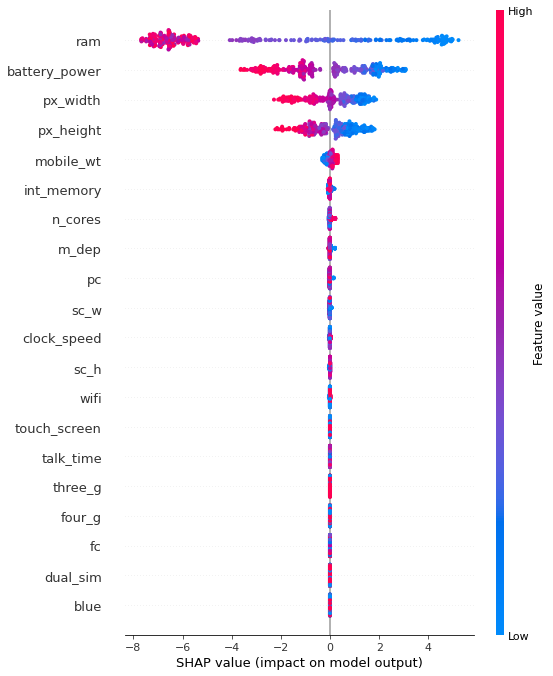

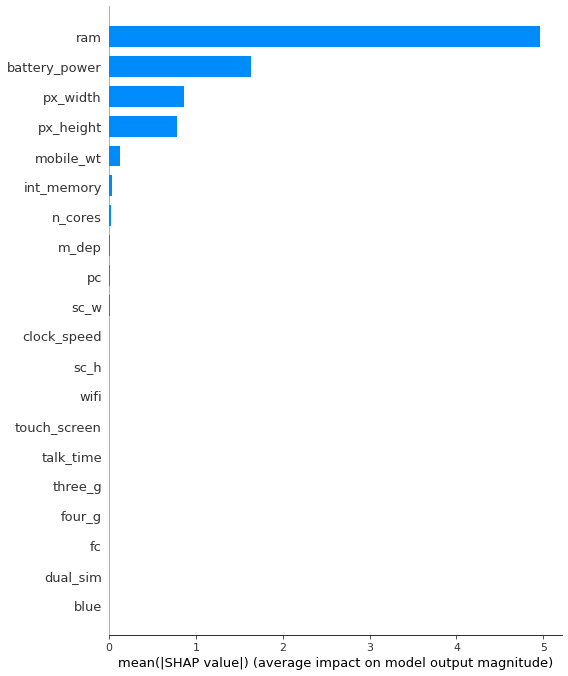

In [ ]:
# Obtain a Scatter Summary Plot  for xg boost
shap_values = shap.TreeExplainer(xgb_1).shap_values(X_test)
shap.summary_plot(shap_values[0], X_test)
shap.summary_plot(shap_values[0], X_test,plot_type='bar')

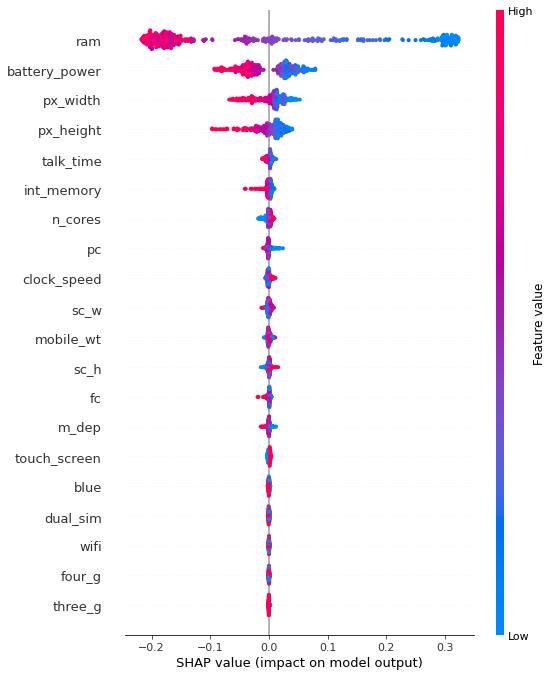

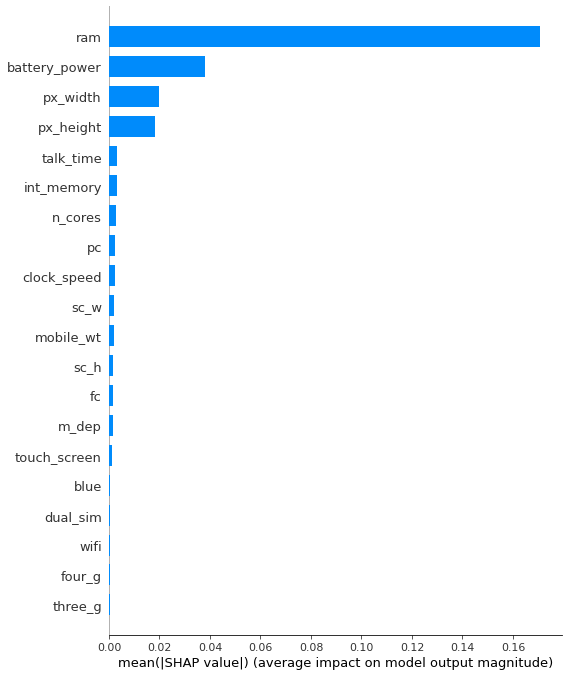

In [ ]:
# Obtain a Scatter Summary Plot  for random forest
shap_values = shap.TreeExplainer(rfc_1).shap_values(X_test)
shap.summary_plot(shap_values[0], X_test)
shap.summary_plot(shap_values[0], X_test,plot_type='bar')

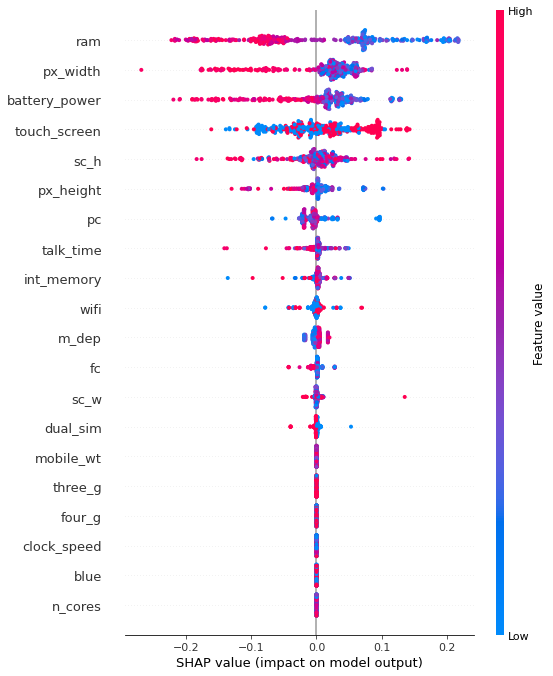

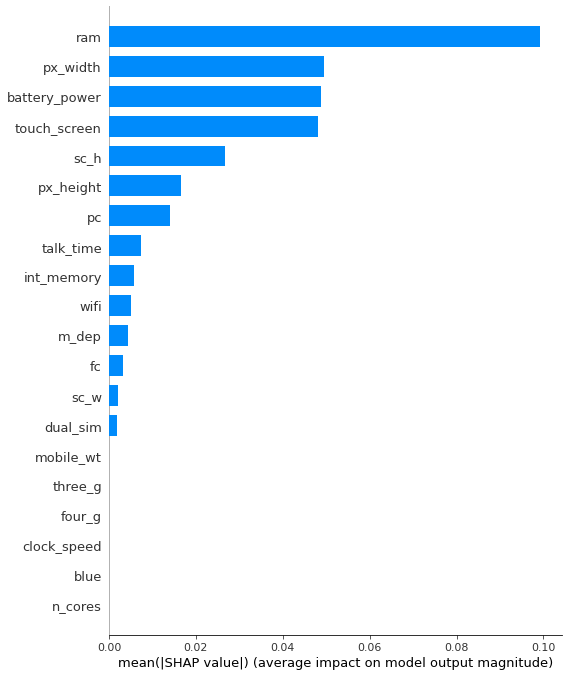

In [ ]:
# Obtain a Scatter Summary Plot  for decision tree
shap_values = shap.TreeExplainer(dtc_1).shap_values(X_test)
shap.summary_plot(shap_values[0], X_test)
shap.summary_plot(shap_values[0], X_test,plot_type='bar')